In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy()

In [5]:
if os.path.isfile("ACT_Selected_Cancer_incidence_and_mortality.csv"):
    filepath = "ACT_Selected_Cancer_incidence_and_mortality.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/Health/ACT-Selected-Cancer-incidence-and-mortality/a2ku-4dqc"
    print("loading from the internet")

cancer_data = pd.read_csv(filepath)
print("done")

loading from file
done


# Cancer Incidences and Mortalities in ACT 1985 - 2019

In this project I explore the dataset and identify the varying trends in the data of the cancer cases by looking into the differences in the cancer types and genders.

Introduction to the Dataset

In [6]:
cancer_data.head()

,CancerType,IncidenceMortality,year,sex,NumberOfCases,AgeAdjustedRate,IncidenceMortality_Sex
0,Bowel C18-C20,Incidence,1985,Male,50,79.9,Incidence Male
1,Bowel C18-C20,Incidence,1986,Male,29,48.8,Incidence Male
2,Bowel C18-C20,Incidence,1987,Male,52,78.3,Incidence Male
3,Bowel C18-C20,Incidence,1988,Male,48,63.7,Incidence Male
4,Bowel C18-C20,Incidence,1989,Male,53,74.2,Incidence Male


Scatterplot of 'Cancer Incidences by Type'

In [77]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female_incidence = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male', 'Incidence Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_incidences = cancer_male_female_incidence[cancer_male_female_incidence["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer
bowel_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Bowel C18-C20"])]
lung_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Lung C33, C34"])]
melanoma_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Melanoma of skin C43"])]
breast_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Breast C50"])]
prostate_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Prostate C61"])]

def incidence_type():
    plt.scatter(bowel_incidences.year, bowel_incidences.NumberOfCases)
    plt.scatter(lung_incidences.year, lung_incidences.NumberOfCases)
    plt.scatter(melanoma_incidences.year, melanoma_incidences.NumberOfCases)
    plt.scatter(breast_incidences.year, breast_incidences.NumberOfCases)
    plt.scatter(prostate_incidences.year, prostate_incidences.NumberOfCases)
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Cancer Incidences', fontsize = 12)
    plt.title('Cancer Incidences by Type', fontsize = 14, fontweight = "bold")
    plt.legend(['Bowel', 'Lung', 'Melanoma', 'Breast', 'Prostate'])


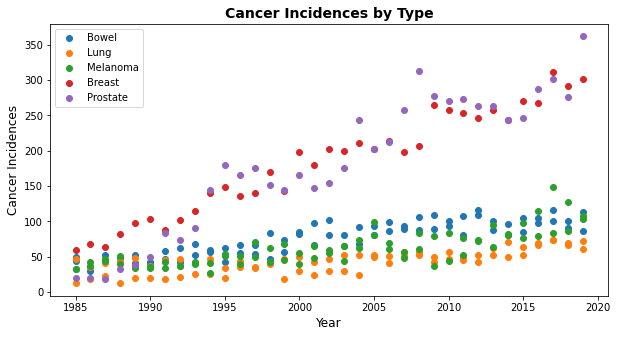

In [78]:
incidence_type()

Scatterplot of 'Cancer Incidences by Gender'

In [75]:
#separating male incidences and 'All Sites'
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_male = cancer_allmale[cancer_allmale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#separating female incidences and 'All Sites'
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_female = cancer_allfemale[cancer_allfemale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#making scatter plot
def incidence_gender():
    plt.scatter(cancer_male.year, cancer_male.NumberOfCases, c="Blue")
    plt.scatter(cancer_female.year, cancer_female.NumberOfCases, c="Red")
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Cancer Incidences', fontsize = 12)
    plt.title('Cancer Incidences by Gender', fontsize = 14, fontweight = "bold")
    plt.legend(['Male', 'Female'])

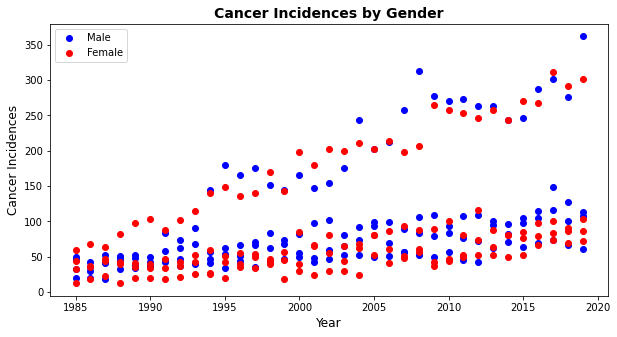

In [76]:
incidence_gender()

Bar Graph of 'Cancer Incidences by Type',  for better visualisation

In [73]:
#adding male incidences
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_malesum = cancer_allmale['NumberOfCases'].sum()
#adding female incidences
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_femalesum = cancer_allfemale['NumberOfCases'].sum()

#making the bar graph
def total_incidence_gender():
        bar_data = {"Gender":["Male", "Female"],
        "Total Incidences":[cancer_malesum, cancer_femalesum]}

        dataFrame = pd.DataFrame(data=bar_data)
        dataFrame.plot.bar(x="Gender", y="Total Incidences", rot=0, color=("Blue", "Red"), legend=False)
        plt.xlabel('Year', fontsize = 12)
        plt.ylabel('Total Incidences', fontsize = 12)
        plt.title('Total Cancer Incidences by Gender', fontsize = 14, fontweight = "bold")

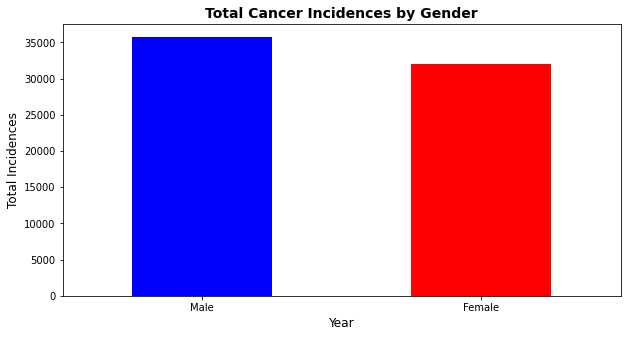

In [74]:
total_incidence_gender()

Bar Graph of 'Total Cancer Incidences by Type'

In [70]:
#creating sums of cancer types
bowel_sum = bowel_incidences["NumberOfCases"].sum()
lung_sum = lung_incidences["NumberOfCases"].sum()
melanoma_sum = melanoma_incidences["NumberOfCases"].sum()
breast_sum = breast_incidences["NumberOfCases"].sum()
prostate_sum = prostate_incidences["NumberOfCases"].sum()

#making the bar graph
def total_incidence_type():
        bar_data = {"Cancer Type":["Bowel","Lung","Melanoma","Breast","Prostate"],
        "Total Incidences":[bowel_sum, lung_sum, melanoma_sum, breast_sum, prostate_sum]}
        dataFrame = pd.DataFrame(data=bar_data)
        dataFrame.plot.bar(x="Cancer Type", y="Total Incidences", rot=0, color=("Blue", "Orange", "Green", "Red", "Purple"), legend=False)
        plt.xlabel('Cancer Type', fontsize = 12)
        plt.ylabel('Total Incidences', fontsize = 12)
        plt.title('Total Cancer Incidences by Type', fontsize = 14, fontweight = "bold")

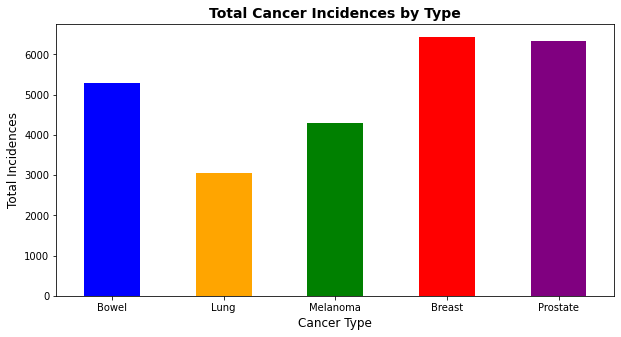

In [71]:
total_incidence_type()

Bar Graph of 'Total Cancer Incidences by Gender and Type'

In [68]:
#creating separating by gender and type
bowel_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Bowel C18-C20'])]
bowel_male_sum = bowel_male['NumberOfCases'].sum()

bowel_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Bowel C18-C20'])]
bowel_female_sum = bowel_female['NumberOfCases'].sum()

lung_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Lung C33, C34'])]
lung_male_sum = lung_male['NumberOfCases'].sum()

lung_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Lung C33, C34'])]
lung_female_sum = lung_female['NumberOfCases'].sum()

melanoma_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Melanoma of skin C43'])]
melanoma_male_sum = melanoma_male['NumberOfCases'].sum()

melanoma_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Melanoma of skin C43'])]
melanoma_female_sum = melanoma_female['NumberOfCases'].sum()

breast_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Breast C50'])]
breast_male_sum = breast_male['NumberOfCases'].sum()

breast_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Breast C50'])]
breast_female_sum = breast_female['NumberOfCases'].sum()

prostate_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Prostate C61'])]
prostate_male_sum = prostate_male['NumberOfCases'].sum()

prostate_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Prostate C61'])]
prostate_female_sum = prostate_female['NumberOfCases'].sum()


#making the bar graph
def total_incidence_gender_type():
        bar_data = {"Male":[bowel_male_sum, lung_male_sum, melanoma_male_sum, breast_male_sum, prostate_male_sum],
        "Female":[bowel_female_sum, lung_female_sum, melanoma_female_sum, breast_female_sum, prostate_female_sum]}

        index     = ["Bowel", "Lung", "Melanoma", "Breast", "Prostate"]

        dataFrame = pd.DataFrame(data=bar_data, index=index)

        dataFrame.plot.bar(rot=0, color=("Blue", "Red") )


        plt.xlabel('Cancer Type', fontsize = 12)
        plt.ylabel('Total Incidences', fontsize = 12)
        plt.title('Total Cancer Incidences by Gender and Type', fontsize = 14, fontweight = "bold")

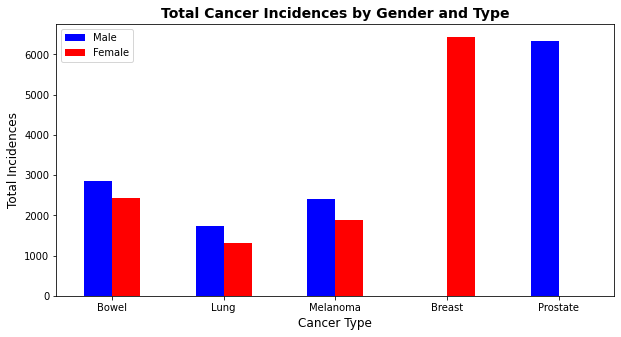

In [69]:
total_incidence_gender_type()

Bar Graph of 'Total Cancer Incidences and Mortalities by Gender'

In [61]:
#adding male mortalities
mortality_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male'])]
mortality_malesum = mortality_allmale['NumberOfCases'].sum()
#adding female mortalities
mortality_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Female'])]
mortality_femalesum = mortality_allfemale['NumberOfCases'].sum()

#making the bar graph
def total_incidence_mortality():
        bar_data = {"Incidences":[cancer_malesum, cancer_femalesum],
        "Mortalities":[mortality_malesum, mortality_femalesum]}
        index = ["Male", "Female"]
        dataFrame = pd.DataFrame(data=bar_data, index=index)
        dataFrame.plot.bar(rot=0, color=("seagreen", "orangered"))
        plt.xlabel('Sex', fontsize = 12)
        plt.ylabel('Total Incidences and Mortalities', fontsize = 12)
        plt.title('Total Cancer Incidences and Mortalities by Gender', fontsize = 14, fontweight = "bold")

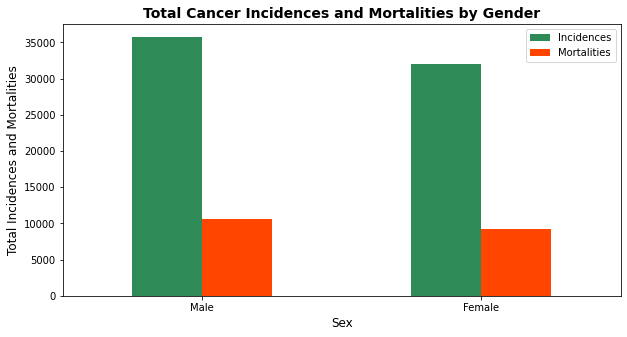

In [62]:
total_incidence_mortality()

Scatterplot of 'Cancer Mortalites by Type'

In [56]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female_mortality = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male', 'Mortality Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_mortalities = cancer_male_female_mortality[cancer_male_female_mortality["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer

bowel_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Bowel C18-C20"])]
lung_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Lung C33, C34"])]
breast_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Breast C50"])]
prostate_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Prostate C61"])]

def mortalities_type():
    plt.scatter(bowel_mortalities.year, bowel_mortalities.NumberOfCases)
    plt.scatter(lung_mortalities.year, lung_mortalities.NumberOfCases)
    plt.scatter(breast_mortalities.year, breast_mortalities.NumberOfCases)
    plt.scatter(prostate_mortalities.year, prostate_mortalities.NumberOfCases)
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Cancer Mortalites', fontsize = 12)
    plt.title('Cancer Mortalites by Type', fontsize = 14, fontweight = "bold")
    plt.legend(['Bowel', 'Lung', 'Breast', 'Prostate'])


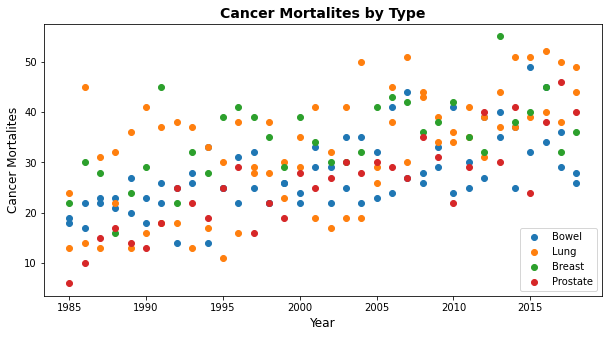

In [57]:
mortalities_type()

In [49]:
#adding male mortalities
mortality_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male'])]
mortality_malesum = mortality_allmale['NumberOfCases'].sum()
#adding female mortalities
mortality_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Female'])]
mortality_femalesum = mortality_allfemale['NumberOfCases'].sum()


#creating separating by gender and type
bowel_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Bowel C18-C20'])]
bowel_mortalitymale_sum = bowel_mortalitymale['NumberOfCases'].sum()

bowel_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Bowel C18-C20'])]
bowel_mortalityfemale_sum = bowel_mortalityfemale['NumberOfCases'].sum()

lung_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Lung C33, C34'])]
lung_mortalitymale_sum = lung_mortalitymale['NumberOfCases'].sum()

lung_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Lung C33, C34'])]
lung_mortalityfemale_sum = lung_mortalityfemale['NumberOfCases'].sum()

breast_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Breast C50'])]
breast_mortalitymale_sum = breast_mortalitymale['NumberOfCases'].sum()

breast_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Breast C50'])]
breast_mortalityfemale_sum = breast_mortalityfemale['NumberOfCases'].sum()

prostate_mortalitymale = mortality_allmale[mortality_allmale['CancerType'].isin(['Prostate C61'])]
prostate_mortalitymale_sum = prostate_mortalitymale['NumberOfCases'].sum()

prostate_mortalityfemale = mortality_allfemale[mortality_allfemale['CancerType'].isin(['Prostate C61'])]
prostate_mortalityfemale_sum = prostate_mortalityfemale['NumberOfCases'].sum()


#making the bar graph
def mortalities_gender_type():
        bar_data = {"Male":[bowel_mortalitymale_sum, lung_mortalitymale_sum, breast_mortalitymale_sum, prostate_mortalitymale_sum],
                "Female":[bowel_mortalityfemale_sum, lung_mortalityfemale_sum, breast_mortalityfemale_sum, prostate_mortalityfemale_sum]}

        index     = ["Bowel", "Lung", "Breast", "Prostate"]

        dataFrame = pd.DataFrame(data=bar_data, index=index)

        dataFrame.plot.bar(rot=0, color=("Blue", "Red"))

        plt.xlabel('Cancer Type', fontsize = 12)
        plt.ylabel('Total Mortalities', fontsize = 12)
        plt.title('Total Cancer Mortalities by Gender and Type', fontsize = 14, fontweight = "bold")



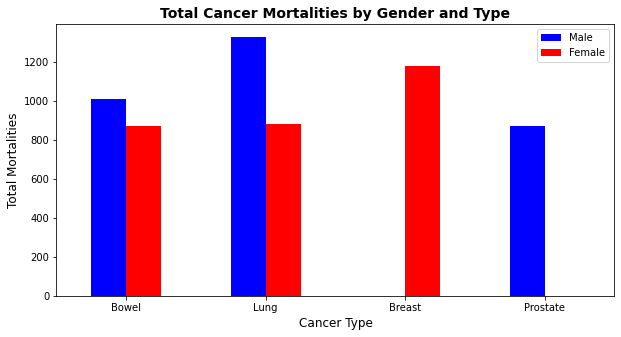

In [50]:
mortalities_gender_type()

Box Plot of 'Distribution of Lung Cancer Mortalities by Gender'

In [54]:
#making bowel mortalities list by gender
lung_mortalities_male = lung_mortalities[lung_mortalities["sex"].isin(["Male"])]
lung_mortalities_malenumbers = lung_mortalities_male['NumberOfCases'] 

lung_mortalities_female = lung_mortalities[lung_mortalities["sex"].isin(["Female"])]
lung_mortalities_femalenumbers = lung_mortalities_female['NumberOfCases']

#doing box plot
def lung_boxplot():
    data = pd.DataFrame({"Male": lung_mortalities_malenumbers, "Female": lung_mortalities_femalenumbers})
    boxes = data[['Male', 'Female']].plot(kind='box', title='boxplot', vert=False, patch_artist=True)
    labels = ['Male', 'Female']
    plt.xlabel('Cancer Mortalites', fontsize = 12)
    plt.title('Distribution of Lung Cancer Mortalities by Gender', fontsize = 14, fontweight = "bold")


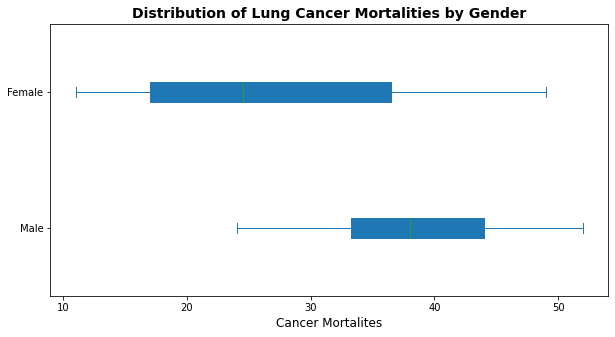

In [55]:
lung_boxplot()

Box Plot of 'Distribution of Bowel Cancer Mortalities by Gender'

In [52]:
#making bowel mortalities list by gender
bowel_mortalities_male = bowel_mortalities[bowel_mortalities["sex"].isin(["Male"])]
bowel_mortalities_malenumbers = bowel_mortalities_male['NumberOfCases'] 

bowel_mortalities_female = bowel_mortalities[bowel_mortalities["sex"].isin(["Female"])]
bowel_mortalities_femalenumbers = bowel_mortalities_female['NumberOfCases']

#doing box plot
def bowel_boxplot():
    data = pd.DataFrame({"Male": bowel_mortalities_malenumbers, "Female": bowel_mortalities_femalenumbers})
    boxes = data[['Male', 'Female']].plot(kind='box', title='boxplot', vert=False, patch_artist=True)
    labels = ['Male', 'Female']
    plt.xlabel('Cancer Mortalites', fontsize = 12)
    plt.title('Distribution of Bowel Cancer Mortalities by Gender', fontsize = 14, fontweight = "bold")


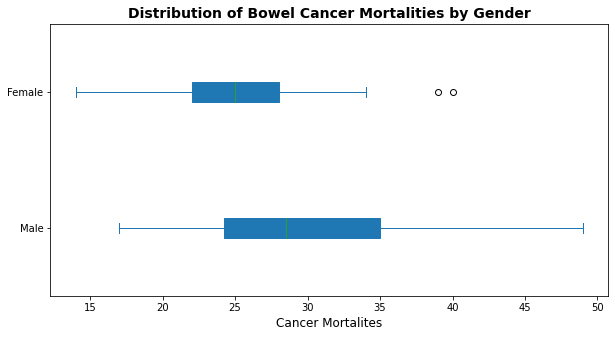

In [53]:
bowel_boxplot()

Thanks for watching!